**Name: Yutika Rege**

**Date: 17-07-2021**

**PRN: 1901202012**

**School: Data Science**

**Program: B.Sc. Data Science**

**Year/ Semester: 2nd / 4th**

**Subject Name: Machine Learning 2**

**Subject Code: DS401**

**Title: Classification on Forest dataset.**

**Skills/Competencies to be acquired:**

1. Classification.

2. Model selection.

3. Data cleaning, EDA and Feature engineering.

**Duration of activity: 2 Hours**

**1. What is the purpose of this activity?**

The purpose of this activity is to apply different classification algorithms to predict the possibilities of a forest fire occuring on the given dataset and select the best suited classification algorithm for gaining optimal results.

**2. Steps performed in this activity.**

1. Import the required modules and read the data.

2. Perform statistical as well as visual EDA over the data.

3. Find correlations using a heatmap.

4. Split the data in independent and dependent features.

5. Split the data into an 67 : 33 :: train : test ratio.

6. Train the data using different model.

7. Note the accuracies and compare the models.

-------------------------------------------------------------------------------------------------------------------------------

**Importing essential modules:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("talk")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

**Reading the data:**

There were two regions in the dataset for forest fires in the Algerian forests _viz._ _**Bejaia**_ and _**Sidi-Bel Abbes**_ The workbook was converted from csv to xlsx format and was divided into 2 data sheets for the two regions.

In [2]:
bejaia = pd.read_excel("Algerian_ForestFire.xlsx",sheet_name="Bejaia")
sba = pd.read_excel("Algerian_ForestFire.xlsx",sheet_name="SBA")

In [3]:
print(f"Bejaia data sheet shape:{bejaia.shape}\nSidi-Bela Abbes data sheet shape:{sba.shape}")

Bejaia data sheet shape:(122, 14)
Sidi-Bela Abbes data sheet shape:(122, 14)


In [4]:
bejaia.head(4)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire


In [5]:
sba.head(4)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire


In [6]:
print(f"Columns of Bejaia:{bejaia.columns}\n\nColumns of Sidi-Bela Abbes:{sba.columns}")

Columns of Bejaia:Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

Columns of Sidi-Bela Abbes:Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')


It seems like the column names of these variables have a few white spaces. We will remove those.

In [7]:
bejaia.columns = bejaia.columns.str.lstrip()
bejaia.columns = bejaia.columns.str.rstrip()
sba.columns = sba.columns.str.lstrip()
sba.columns = sba.columns.str.rstrip()

In [8]:
print(f"Columns of Bejaia:{bejaia.columns}\n\nColumns of Sidi-Bela Abbes:{sba.columns}")

Columns of Bejaia:Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

Columns of Sidi-Bela Abbes:Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')


The white spaces have been successfully removed from column names.

In [9]:
bejaia.isna().sum().sum()

0

In [10]:
sba.isna().sum().sum()

1

In [11]:
sba = sba.dropna()
sba.shape

(121, 14)

There just 1 missing value in the Sidi-Bel Abbes forest data which was removed.

**Keeping only the relevant columns:**

In [12]:
bejaia = bejaia.iloc[:,3:]
sba = sba.iloc[:,3:]

In [13]:
bejaia.head(4)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire


In [14]:
sba.head(4)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire


**Checking for data types:**

In [15]:
bejaia.dtypes

Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object

In [16]:
sba.dtypes

Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC              object
ISI            float64
BUI            float64
FWI             object
Classes         object
dtype: object

**Changing the data types of variables in the Sidi-Bel Abbes data:**

In [17]:
sba["DC"] = np.float64(sba["DC"])
sba["FWI"] = np.float64(sba["FWI"])

**Binarising the target feature "Classes" in both the data sets:**

In [18]:
bejaia["Classes"].unique()

array(['not fire', 'fire'], dtype=object)

In [19]:
sba["Classes"].unique()

array(['not fire', 'fire'], dtype=object)

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bejaia["Classes"]=le.fit_transform(bejaia["Classes"])
sba["Classes"]=le.fit_transform(sba["Classes"])

In [21]:
bejaia.Classes.head(4)

0    1
1    1
2    1
3    1
Name: Classes, dtype: int32

In [22]:
sba.Classes.head(4)

0    1
1    1
2    1
3    1
Name: Classes, dtype: int32

**Now, Classes:**

    0 = Fire
    
    1 = Not Fire

**Visual EDA:**

Text(0.5, 1.0, 'Heatmap for Bejaia Region\n')

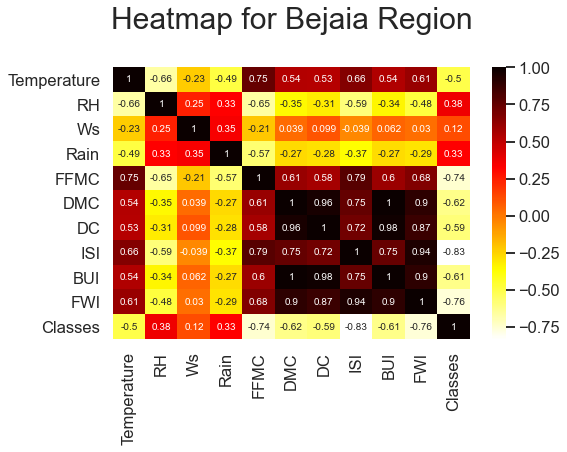

In [23]:
plt.figure(figsize=(8,5))
sns.heatmap(bejaia.corr(),annot=True,cmap="hot_r")
plt.title("Heatmap for Bejaia Region\n",size=30)

Text(0.5, 1.0, 'Heatmap for Sidi-Bel Abbes Region\n')

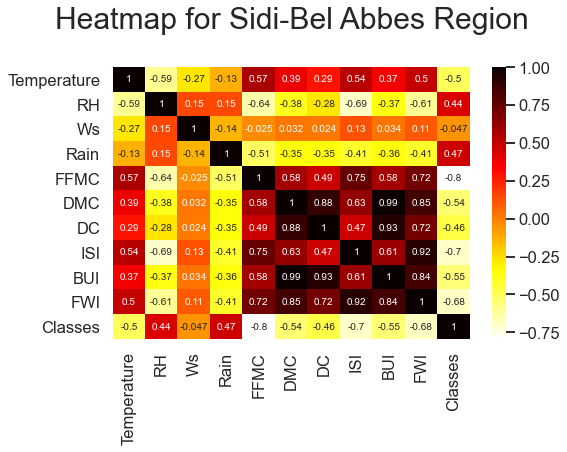

In [24]:
plt.figure(figsize=(8,5))
sns.heatmap(sba.corr(),annot=True,cmap="hot_r")
plt.title("Heatmap for Sidi-Bel Abbes Region\n",size=30)

**Comment:** It looks like for both regions, our target - class shares a positive correlation with relative humidity and rain variables.

Text(0.5, 1.0, 'Sidi-Bel Abbes')

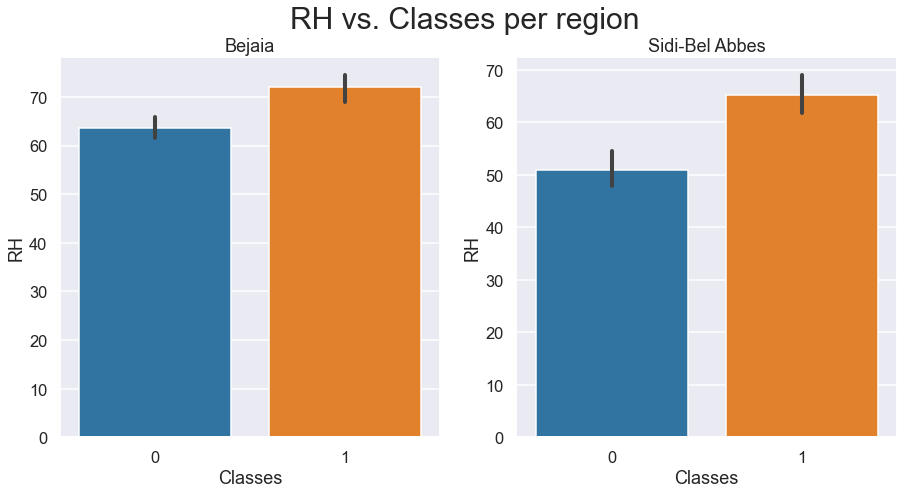

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15,7))
fig.suptitle("RH vs. Classes per region\n\n",size=30)

sns.barplot(ax=axes[0], x=bejaia.Classes, y=bejaia.RH)
axes[0].set_title("Bejaia")

sns.barplot(ax=axes[1], x=sba.Classes, y=sba.RH)
axes[1].set_title("Sidi-Bel Abbes")

Text(0.5, 1.0, 'Sidi-Bel Abbes')

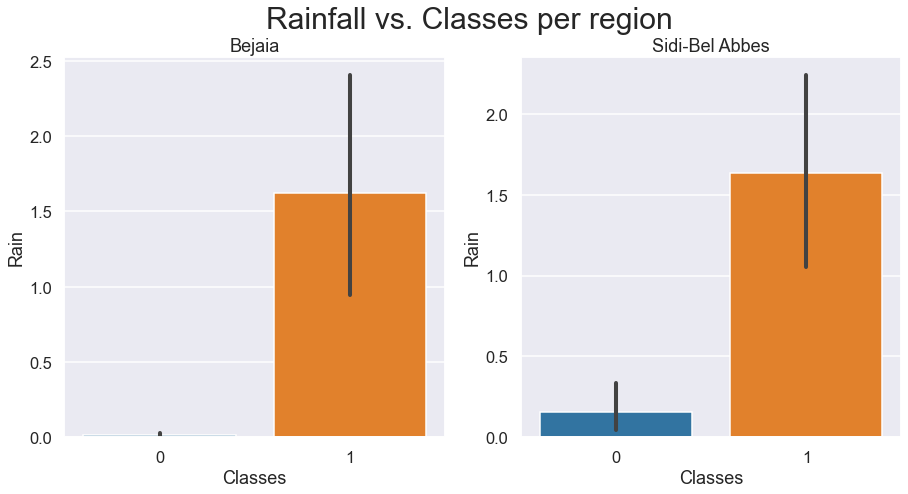

In [26]:
fig, axes1 = plt.subplots(1, 2, figsize=(15,7))
fig.suptitle("Rainfall vs. Classes per region\n\n",size=30)

sns.barplot(ax=axes1[0], x=bejaia.Classes, y=bejaia.Rain)
axes1[0].set_title("Bejaia")

sns.barplot(ax=axes1[1], x=sba.Classes, y=sba.Rain)
axes1[1].set_title("Sidi-Bel Abbes")

**Comment:** It is an established fact that lower the rainfall and humidity, more are the chances of a forest fire occuring. It also looks like there was no rain at all on certain days in the Bejaia region whereas the Sidi-Bel Abbes region had at least some rainfall. Bejaia region is slightly more humid overall as compared to Sidi-Bel Abbes region but observes lesser rainfall.

Text(0.5, 1.0, 'Sidi-Bel Abbes')

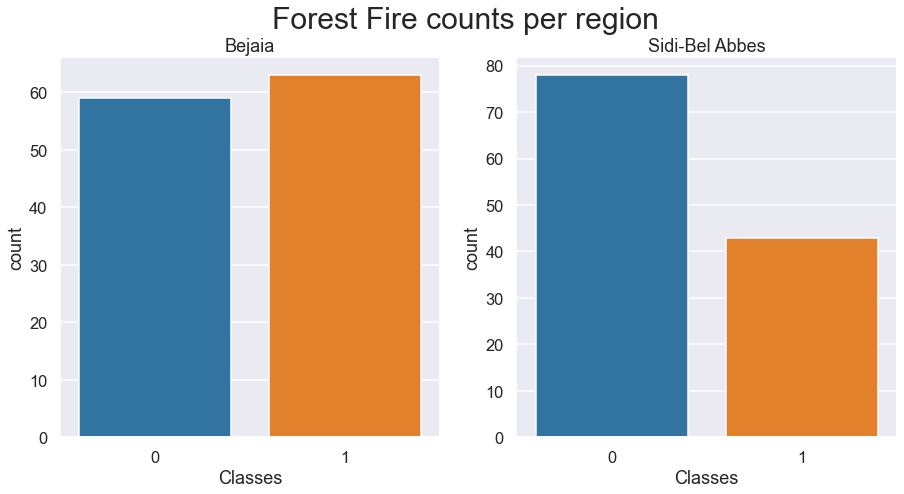

In [27]:
fig, axes2 = plt.subplots(1, 2, figsize=(15,7))
fig.suptitle("Forest Fire counts per region",size=30)

sns.countplot(ax=axes2[0], x=bejaia.Classes)
axes2[0].set_title("Bejaia")

sns.countplot(ax=axes2[1], x=sba.Classes)
axes2[1].set_title("Sidi-Bel Abbes")

**Comment:** Bejaia has lesser cases of forest fires and the region Sidi-Bel Abbes has more cases of forest fires; this is owing to the fact that humidity is lower in the latter.

Text(0.5, 1.0, 'Sidi-Bel Abbes')

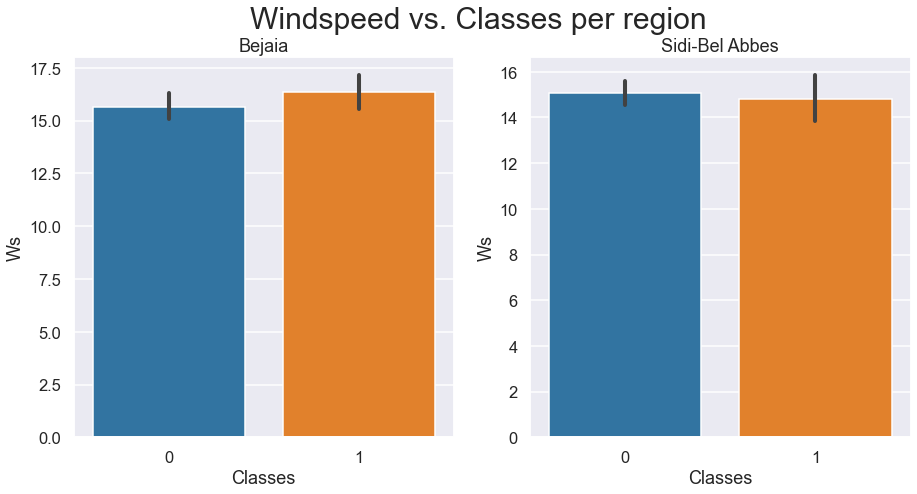

In [28]:
fig, axes3 = plt.subplots(1, 2, figsize=(15,7))
fig.suptitle("Windspeed vs. Classes per region\n\n",size=30)

sns.barplot(ax=axes3[0], x=bejaia.Classes, y=bejaia.Ws)
axes3[0].set_title("Bejaia")

sns.barplot(ax=axes3[1], x=sba.Classes, y=sba.Ws)
axes3[1].set_title("Sidi-Bel Abbes")

**Comment:** The higher the wind speed in Bejaia, the lower the chances of a fire whereas, the lower the wind speed in Sidi-Bel Abbes, higher the chances of a forest fire occuring.

**Prediction:**

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

# Bejaia region Forest Fire:

In [30]:
Xb = bejaia.iloc[:,:-1].values
yb = bejaia.iloc[:,-1].values

In [31]:
Xb_train,Xb_test,yb_train,yb_test = train_test_split(Xb,yb,test_size=0.33) 

In [32]:
Xb_test.shape

(41, 10)

In [33]:
yb_train.shape

(81,)

In [34]:
yb = np.array(yb)
yb

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1])

**a) Logistic Regression:**

In [35]:
logreg_b = LogisticRegression()
logreg_b.fit(Xb_train,yb_train)
yb_lr_pred = logreg_b.predict(Xb_test)

In [36]:
print(classification_report(yb_test,yb_lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        21

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



In [37]:
print(confusion_matrix(yb_test,yb_lr_pred))

[[20  0]
 [ 0 21]]


**b) Naive-Bayes:**

In [38]:
gnb_b = GaussianNB()
gnb_b.fit(Xb_train,yb_train)
yb_gnb_pred = gnb_b.predict(Xb_test)

In [39]:
print(classification_report(yb_test,yb_gnb_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.95      0.95      0.95        21

    accuracy                           0.95        41
   macro avg       0.95      0.95      0.95        41
weighted avg       0.95      0.95      0.95        41



In [40]:
print(confusion_matrix(yb_test,yb_gnb_pred))

[[19  1]
 [ 1 20]]


**c) Random Forest:**

In [41]:
rf_b = RandomForestClassifier()
rf_b.fit(Xb_train,yb_train)
yb_rf_pred = rf_b.predict(Xb_test)

In [42]:
print(classification_report(yb_test,yb_rf_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       0.95      0.90      0.93        21

    accuracy                           0.93        41
   macro avg       0.93      0.93      0.93        41
weighted avg       0.93      0.93      0.93        41



In [43]:
print(confusion_matrix(yb_test,yb_rf_pred))

[[19  1]
 [ 2 19]]


# Sidi-Bel Abbes region Forest Fire:

In [57]:
Xs = sba.iloc[:,:-1].values
ys = sba.iloc[:,-1].values

In [58]:
Xs_train,Xs_test,ys_train,ys_test = train_test_split(Xs,ys,test_size=0.33) 

**a) Logistic Regression:**

In [59]:
logreg_s = LogisticRegression()
logreg_s.fit(Xs_train,ys_train)
ys_lr_pred = logreg_s.predict(Xs_test)

In [60]:
print(classification_report(ys_test,ys_lr_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.94      1.00      0.97        17

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [61]:
print(confusion_matrix(ys_test,ys_lr_pred))

[[22  1]
 [ 0 17]]


**b) Naive Bayes:**

In [62]:
gnb_s = GaussianNB()
gnb_s.fit(Xs_train,ys_train)
ys_gnb_pred = gnb_s.predict(Xs_test)

In [63]:
print(classification_report(ys_test,ys_gnb_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.88      0.94        17

    accuracy                           0.95        40
   macro avg       0.96      0.94      0.95        40
weighted avg       0.95      0.95      0.95        40



In [64]:
print(confusion_matrix(ys_test,ys_gnb_pred))

[[23  0]
 [ 2 15]]


**c) Random Forest:**

In [65]:
rf_s = RandomForestClassifier()
rf_s.fit(Xs_train,ys_train)
ys_rf_pred = rf_s.predict(Xs_test)

In [66]:
print(classification_report(ys_test,ys_rf_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.94      0.97        17

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



In [67]:
print(confusion_matrix(yb_test,yb_rf_pred))

[[19  1]
 [ 2 19]]


**Comment:** The most accurate prediction of forest fires in Bejaia region is made by Logistic Regression model and for Sidi-Bel Abbes there is a tie between Logistic Regression and Random Forest classifier. 

In [68]:
# predicting for Bejaia region:
logreg_b.predict([[27,57,18,0,67,4,8,1.3,3.5,0.6]])

array([1])

In [69]:
# predicting for Sidi-Bel Abbes region:
rf_s.predict([[30,70,11,0.5,58,5,8,1,3,0.62]])

array([1])

In [70]:
logreg_s.predict([[30,70,11,0.5,58,5,8,1,3,0.62]])

array([1])

**Comment:** Both models are able to predict correctly there will be forest fires in the 2 regions based on the given parameters.